# **Attrition Prediction: Human Resources**
- **Nama:** Muhammad Azhar Fikri
- **Email:** muhammadazharfikri990@gmail.com
- **ID Dicoding:** ririee

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"

## **Data Understanding**

Data ini berisi detail demografis, metrik terkait pekerjaan, dan indikator apakah karyawan mengalami attrition (berhenti bekerja).

- **EmployeeId** - ID Karyawan
- **Attrition** - Apakah karyawan berhenti? (0=tidak, 1=ya)
- **Age** - Usia karyawan
- **BusinessTravel** - Frekuensi perjalanan dinas untuk pekerjaan
- **DailyRate** - Gaji harian
- **Department** - Departemen tempat bekerja
- **DistanceFromHome** - Jarak dari rumah ke tempat kerja (dalam km)
- **Education** - Tingkat pendidikan (1-Di bawah kuliah, 2-Kuliah, 3-Sarjana, 4-Magister, 5-Doktor)
- **EducationField** - Bidang pendidikan
- **EnvironmentSatisfaction** - Kepuasan terhadap lingkungan kerja (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **Gender** - Jenis kelamin karyawan
- **HourlyRate** - Gaji per jam
- **JobInvolvement** - Keterlibatan dalam pekerjaan (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **JobLevel** - Tingkatan pekerjaan (1 sampai 5)
- **JobRole** - Peran atau jabatan pekerjaan
- **JobSatisfaction** - Kepuasan terhadap pekerjaan (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **MaritalStatus** - Status pernikahan
- **MonthlyIncome** - Gaji bulanan
- **MonthlyRate** - Tarif bulanan
- **NumCompaniesWorked** - Jumlah perusahaan yang pernah dijadikan tempat kerja
- **Over18** - Apakah berusia di atas 18 tahun?
- **OverTime** - Apakah bekerja lembur?
- **PercentSalaryHike** - Persentase kenaikan gaji tahun lalu
- **PerformanceRating** - Penilaian kinerja (1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa)
- **RelationshipSatisfaction** - Kepuasan hubungan kerja (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **StandardHours** - Jam kerja standar
- **StockOptionLevel** - Tingkat opsi saham
- **TotalWorkingYears** - Total tahun bekerja
- **TrainingTimesLastYear** - Jumlah pelatihan yang diikuti tahun lalu
- **WorkLifeBalance** - Keseimbangan kerja dan kehidupan pribadi (1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa)
- **YearsAtCompany** - Lama bekerja di perusahaan saat ini (dalam tahun)
- **YearsInCurrentRole** - Lama menjabat posisi saat ini (dalam tahun)
- **YearsSinceLastPromotion** - Lama sejak promosi terakhir (dalam tahun)
- **YearsWithCurrManager** - Lama bekerja dengan manajer saat ini (dalam tahun)


## **Data Preparation**

In [3]:
df = pd.read_csv(raw)
df.sample(10).T

,604,1233,1176,197,1056,1192,5,722,602,1373
EmployeeId,605,1234,1177,198,1057,1193,6,723,603,1374
Age,36,35,30,41,36,32,29,45,37,50
Attrition,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,530,607,438,337,1351,906,352,194,571,691
Department,Sales,Research & Development,Research & Development,Sales,Research & Development,Sales,Human Resources,Research & Development,Research & Development,Research & Development
DistanceFromHome,3,9,18,8,26,7,6,9,10,2
Education,1,3,3,3,4,3,1,3,1,3
EducationField,Life Sciences,Life Sciences,Life Sciences,Marketing,Life Sciences,Life Sciences,Medical,Life Sciences,Life Sciences,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [7]:
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

print("Jumlah data numerik :", len(num))
print("Jumlah data kategorik :", len(cat))

Jumlah data numerik : 27
Jumlah data kategorik : 8


In [8]:
df.Attrition.value_counts()

,count
Attrition,
0.0,879
1.0,179


In [9]:
summary = []

for col in num:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outlier_mask = ~df[col].between(low, high)
    summary.append({
        "Nama Kolom": col,
        "Apakah Outlier": outlier_mask.any(),
        "Batas Bawah": low,
        "Batas Atas": high,
        "Outlier": outlier_mask.sum(),
        "Bukan Outlier": (~outlier_mask).sum()
    })

combined_outlier_mask = np.all([
    df[col].between(df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)),
                    df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))
    for col in num
], axis=0)

print(f'Jumlah baris : {len(df)}')
print("Jumlah Outlier pada Seluruh Data :", (~combined_outlier_mask).sum())
print("Jumlah Data yang Bukan Outlier :", combined_outlier_mask.sum())

pd.DataFrame(summary)

Jumlah baris : 1470
Jumlah Outlier pada Seluruh Data : 1018
Jumlah Data yang Bukan Outlier : 452


,Nama Kolom,Apakah Outlier,Batas Bawah,Batas Atas,Outlier,Bukan Outlier
0,EmployeeId,False,-733.500,2204.500,0,1470
1,Age,False,10.500,62.500,0,1470
2,Attrition,True,0.000,0.000,591,879
3,DailyRate,False,-573.000,2195.000,0,1470
4,DistanceFromHome,False,-16.000,32.000,0,1470
5,Education,False,-1.000,7.000,0,1470
6,EmployeeCount,False,1.000,1.000,0,1470
7,EnvironmentSatisfaction,False,-1.000,7.000,0,1470
8,HourlyRate,False,-5.625,137.375,0,1470
9,JobInvolvement,False,0.500,4.500,0,1470


## **Data Cleaning**

In [10]:
dfc = df.copy()

In [11]:
dfc = dfc.drop(['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [12]:
dfc.dropna(axis=0, inplace=True)
dfc["Attrition"] = dfc["Attrition"].astype(int)
dfc.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [13]:
num = dfc.select_dtypes(exclude='object').columns
outlier_columns = []

for col in num:
    Q1 = dfc[col].quantile(0.25)
    Q3 = dfc[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR
    outlier_indices = dfc[(dfc[col] < Q1 - outlier_step) | (dfc[col] > Q3 + outlier_step)].index

    if outlier_indices.any():
        outlier_columns.append(col)

print("Total Kolom :", len(dfc.columns))
print("Kolom yang memiliki Outlier :", len(outlier_columns))

Total Kolom : 31
Kolom yang memiliki Outlier : 11


In [14]:
cols_to_handle = [col for col in outlier_columns if col not in ['Attrition', 'PerformanceRating']]

for col in cols_to_handle:
    Q1 = dfc[col].quantile(0.25)
    Q3 = dfc[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    dfo = dfc[(dfc[col] >= lower_limit) & (dfc[col] <= upper_limit)]

print('Baris sebelum menangani outliers :', dfc.shape[0])
print('Baris seetelah menangani outliers :', dfo.shape[0])

Baris sebelum menangani outliers : 1058
Baris seetelah menangani outliers : 1046


## **Data Labelling**

In [15]:
dfv = dfc.copy()

In [16]:
def label_column(fitur):
    if fitur == "Attrition":
        dfv[fitur] = dfv[fitur].apply(lambda x: "Karyawan Bertahan" if x == 0 else "Karyawan Keluar")
    elif fitur == "JobLevel":
        dfv[fitur] = dfv[fitur].map({
            1: "Basic", 2: "Basic",
            3: "Intermediate", 4: "Intermediate",
            5: "Advanced"
        })
    elif fitur == "Education":
        dfv[fitur] = dfv[fitur].map({
            1: "Below College", 2: "College", 3: "Bachelor",
            4: "Master", 5: "Doctor"
        })
    elif fitur == "WorkLifeBalance":
        dfv[fitur] = dfv[fitur].map({
            1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"
        })
    elif fitur in ["YearsAtCompany", "YearsWithCurrManager"]:
        dfv[fitur] = dfv[fitur].apply(lambda x:
            "0-5 years" if x <= 5 else
            "6-10 years" if x <= 10 else
            "11-20 years" if x <= 20 else "> 20 years")
    elif fitur == "DistanceFromHome":
        dfv[fitur] = dfv[fitur].apply(lambda x:
            "0-5 km" if x <= 5 else
            "6-10 km" if x <= 10 else
            "11-15 km" if x <= 15 else
            "16-20 km" if x <= 20 else "> 20 km")
    elif fitur == "PercentSalaryHike":
        dfv[fitur] = dfv[fitur].apply(lambda x:
            "< 15%" if x <= 15 else
            "20%" if x <= 20 else "25%")
    elif fitur == "Age":
        dfv[fitur] = dfv[fitur].apply(lambda x:
            "< 25" if x <= 25 else
            "26-30" if x <= 30 else
            "31-35" if x <= 35 else
            "36-40" if x <= 40 else
            "41-45" if x <= 45 else
            "46-50" if x <= 50 else "> 60")
    else:
        for col in fitur:
            dfv[col] = dfv[col].map({
                1: "Low", 2: "Medium", 3: "High", 4: "Very High"
            })
    return dfv

In [17]:
for fitur in [
    "Attrition", "JobLevel", "Education", "WorkLifeBalance",
    "YearsAtCompany", "YearsWithCurrManager", "DistanceFromHome",
    "PercentSalaryHike", "Age",
    ["EnvironmentSatisfaction", "JobInvolvement", "StockOptionLevel",
     "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction"]
]:
    dfv = label_column(fitur)

In [18]:
dfenc = dfc.copy()

In [19]:
cat = dfenc.select_dtypes(include='object').columns
dfenc[cat].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,746,701,436,620,232,464,751


In [20]:
le = LabelEncoder()
label_encoding = dfenc[cat].columns

for col in label_encoding:
      dfenc[col] = le.fit_transform(dfenc[col])

In [21]:
dfenc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1058 non-null   int64
 1   Attrition                 1058 non-null   int64
 2   BusinessTravel            1058 non-null   int64
 3   DailyRate                 1058 non-null   int64
 4   Department                1058 non-null   int64
 5   DistanceFromHome          1058 non-null   int64
 6   Education                 1058 non-null   int64
 7   EducationField            1058 non-null   int64
 8   EnvironmentSatisfaction   1058 non-null   int64
 9   Gender                    1058 non-null   int64
 10  HourlyRate                1058 non-null   int64
 11  JobInvolvement            1058 non-null   int64
 12  JobLevel                  1058 non-null   int64
 13  JobRole                   1058 non-null   int64
 14  JobSatisfaction           1058 non-null   int

In [22]:
dfmdl = dfenc.copy()

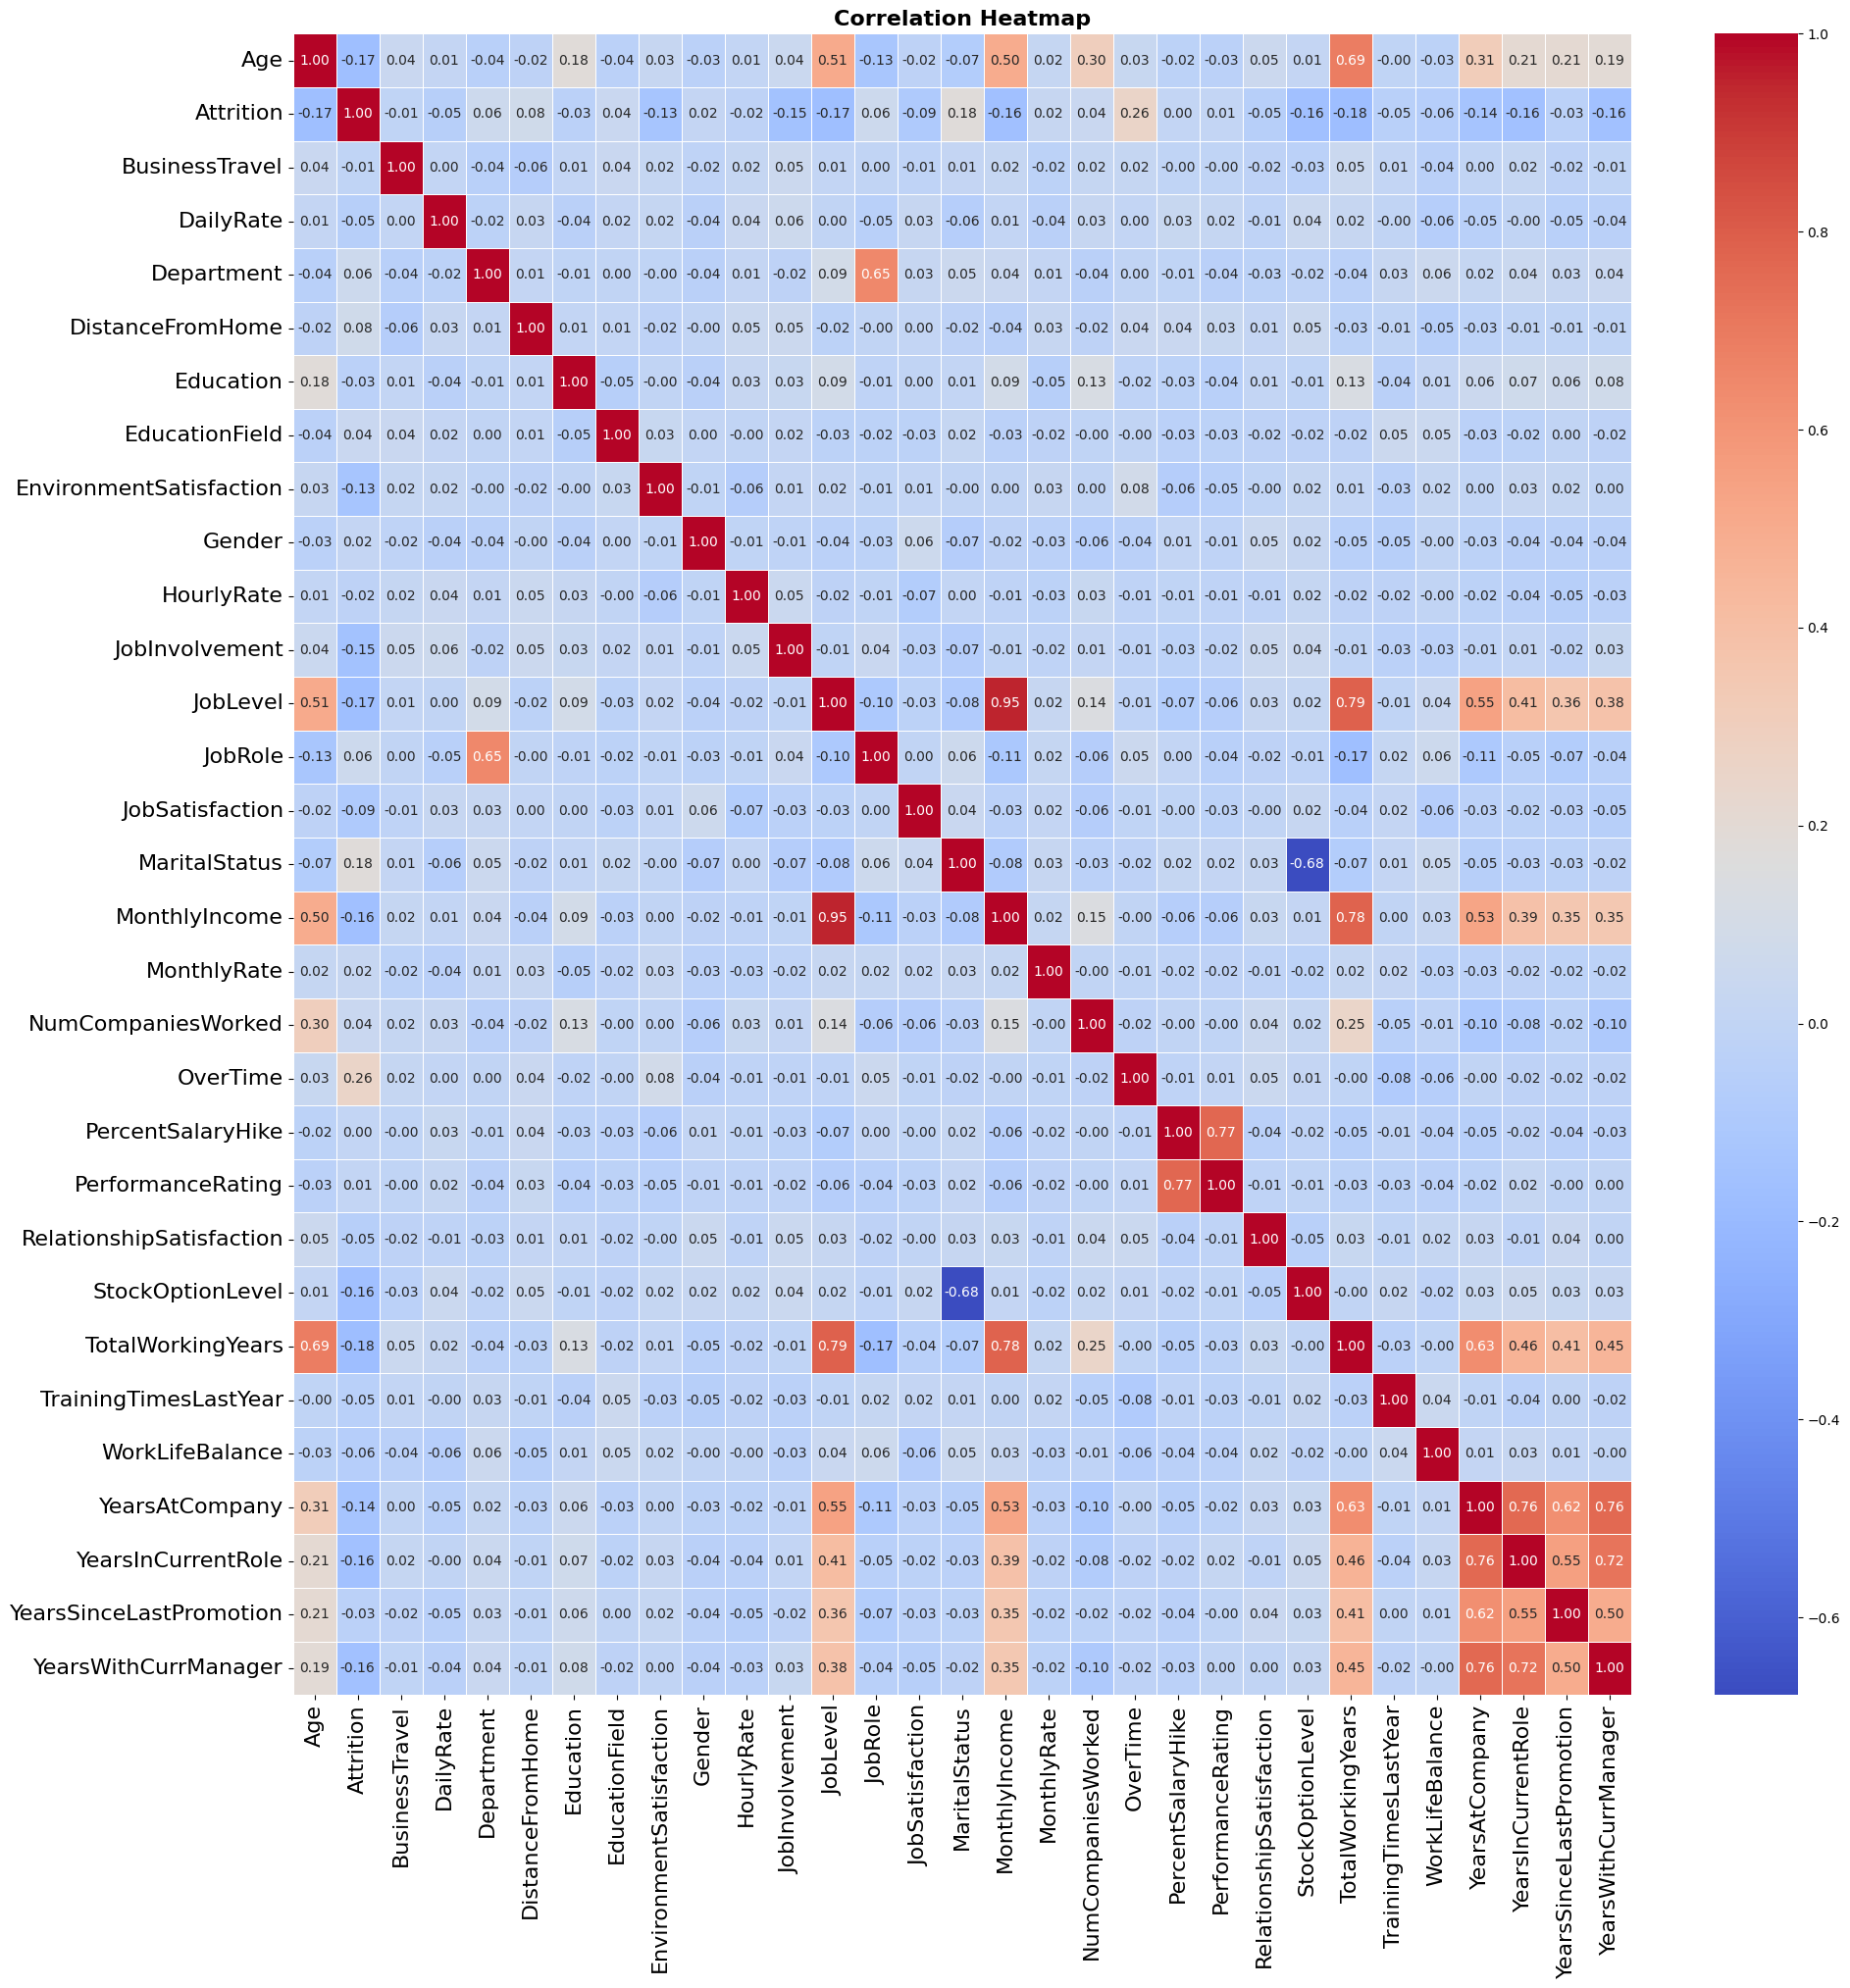

In [23]:
corr = dfmdl.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show()

In [24]:
drop_col = [
    'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
    'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
    'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

dfmdl = dfmdl.drop(drop_col, axis=1)

In [25]:
dfmdl.columns

Index(['Age', 'Attrition', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

## **Data Splitting**

In [26]:
X = dfmdl.drop(columns="Attrition")
y = dfmdl["Attrition"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training :", X_train.shape)
print("Testing :", X_test.shape)

Training : (846, 16)
Testing : (212, 16)


In [28]:
st = StandardScaler()
X_train = st.fit_transform(X_train)

## **Modelling**

In [29]:
models = {}
models['Logistic Regression'] = LogisticRegression(random_state=42)
models['Random Forest'] = RandomForestClassifier(random_state=42)
models['XGBoost'] = XGBClassifier(random_state=42)

In [30]:
accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    models[key].fit(X_train, y_train)

    pred = models[key].predict(X_test)

    accuracy[key] = accuracy_score(y_test, pred)
    precision[key] = precision_score(y_test, pred)
    recall[key] = recall_score(y_test, pred)
    f1[key] = f1_score(y_test, pred)

In [31]:
dfmdl = pd.DataFrame({
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'F1-Score': f1.values()
}, index=models.keys()).round(2)

print(dfmdl)

                     Accuracy  Precision  Recall  F1-Score
Logistic Regression      0.18       0.18    1.00      0.31
Random Forest            0.20       0.14    0.64      0.23
XGBoost                  0.83       1.00    0.08      0.14


## **Evaluation**

In [32]:
os = RandomOverSampler(random_state=42)
X_resampled, y_resampled = os.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [33]:
models = {}
models['Logistic Regression'] = LogisticRegression(random_state=42)
models['Random Forest'] = RandomForestClassifier(random_state=42)
models['XGBoost'] = XGBClassifier(random_state=42)


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       178
           1       0.66      0.66      0.66       174

    accuracy                           0.66       352
   macro avg       0.66      0.66      0.66       352
weighted avg       0.66      0.66      0.66       352



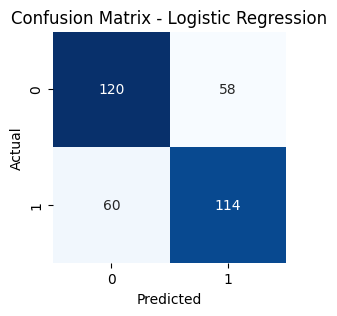


 


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       178
           1       0.94      0.96      0.95       174

    accuracy                           0.95       352
   macro avg       0.95      0.95      0.95       352
weighted avg       0.95      0.95      0.95       352



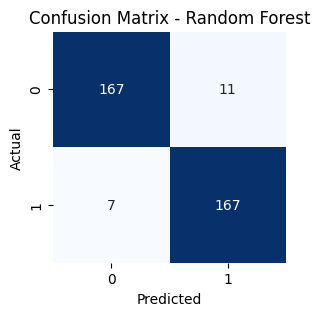


 


=== Classification Report: XGBoost ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       178
           1       0.90      0.96      0.93       174

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352



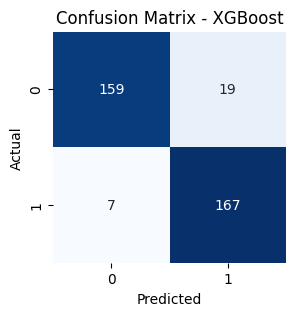


 

Model terbaik: RandomForestClassifier(random_state=42)


In [34]:
best_model    = None
best_accuracy = 0.0

for name, model in models.items():
    model.fit(X_train, y_train)

    predict = model.predict(X_test)

    accuracy = accuracy_score(y_test, predict)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model    = model

    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, predict))

    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n" + " " + "\n")

print(f"Model terbaik: {best_model}")

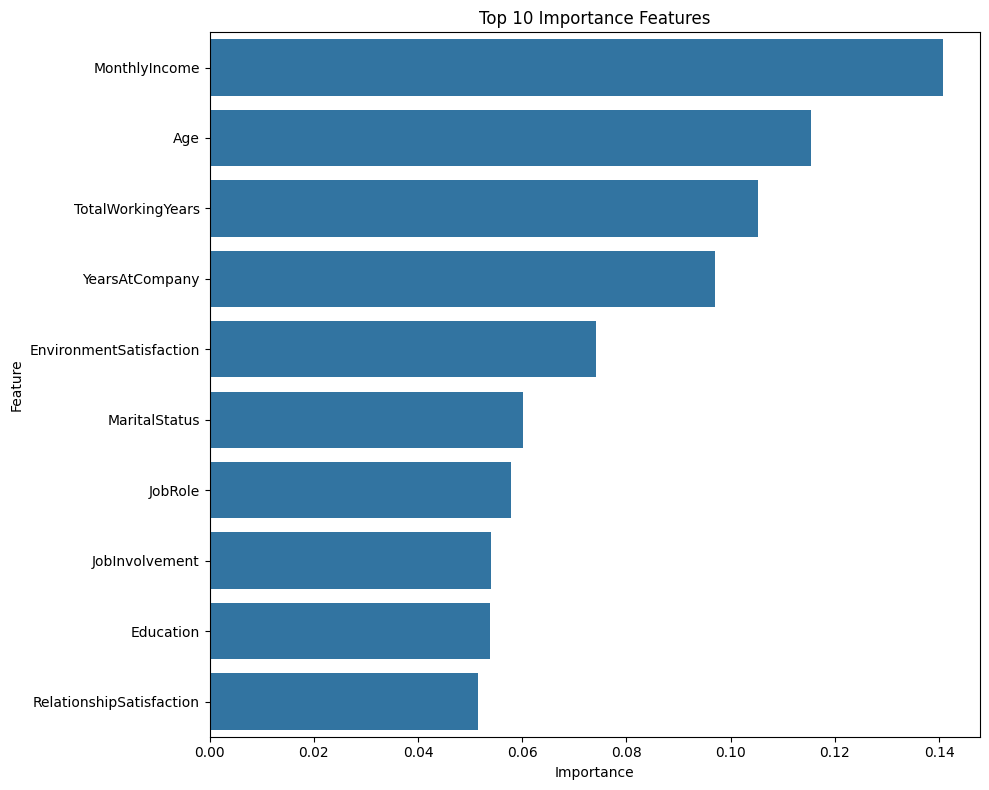

In [40]:
rf = models['Random Forest']

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Importance Features')
plt.tight_layout()
plt.show()

In [41]:
rank_features = feature_importance.head(20)
print("Ranking by most important features:")
print(rank_features)

Ranking by most important features:
                     Feature  Importance
10             MonthlyIncome    0.140804
0                        Age    0.115465
13         TotalWorkingYears    0.105214
15            YearsAtCompany    0.096961
4    EnvironmentSatisfaction    0.074131
9              MaritalStatus    0.060134
8                    JobRole    0.057801
6             JobInvolvement    0.054045
2                  Education    0.053878
12  RelationshipSatisfaction    0.051569
3             EducationField    0.047352
7                   JobLevel    0.044384
14           WorkLifeBalance    0.041880
1                 Department    0.019935
5                     Gender    0.019932
11         PerformanceRating    0.016515


In [42]:
feature_importance.to_csv('feature.csv', index=False)

## **Menyimpan Data Visual, Model, Requirement, dll.**

In [43]:
!pip freeze > requirements.txt

In [44]:
dfc.to_csv("employee_data_bersih.csv", index=False)

dfv.to_csv("employee_data_visual.csv", index=False)

dfmdl.to_csv("employee_data_model.csv", index=False)

In [45]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [46]:
joblib.dump(st, 'scaler.pkl')

['scaler.pkl']

In [47]:
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

data_baru = pd.DataFrame([{
    'Age': 28,
    'Department': 'Sales',
    'Education': 2,
    'EducationField': 'Marketing',
    'EnvironmentSatisfaction': 1,
    'Gender': 'Female',
    'JobInvolvement': 1,
    'JobLevel': 1,
    'JobRole': 'Sales Executive',
    'MaritalStatus': 'Single',
    'MonthlyIncome': 2000,
    'PerformanceRating': 2,
    'RelationshipSatisfaction': 1,
    'TotalWorkingYears': 3,
    'WorkLifeBalance': 1,
    'YearsAtCompany': 2,
}])

map_gender = {'Male': 1, 'Female': 0}
map_dept = {'Sales': 2, 'Research & Development': 1, 'Human Resources': 0}
map_edu_field = {'Life Sciences': 1, 'Medical': 3, 'Marketing': 2, 'Technical Degree': 5, 'Other': 4, 'Human Resources': 0}
map_role = {
    'Research Scientist': 6, 'Laboratory Technician': 3, 'Sales Executive': 8, 'Manufacturing Director': 4,
    'Healthcare Representative': 2, 'Manager': 5, 'Sales Representative': 9,
    'Research Director': 7, 'Human Resources': 1
}
map_marital = {'Single': 2, 'Married': 1, 'Divorced': 0}

data_baru['Gender'] = data_baru['Gender'].map(map_gender)
data_baru['Department'] = data_baru['Department'].map(map_dept)
data_baru['EducationField'] = data_baru['EducationField'].map(map_edu_field)
data_baru['JobRole'] = data_baru['JobRole'].map(map_role)
data_baru['MaritalStatus'] = data_baru['MaritalStatus'].map(map_marital)

urutan_kolom = [
    'Age', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
    'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
    'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction',
    'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany'
]

data_baru = data_baru[urutan_kolom]
data_scaled = scaler.transform(data_baru)

prediction = model.predict(data_scaled)
proba = model.predict_proba(data_scaled)

print("Hasil Prediksi:")
if prediction[0] == 1:
    print(f"Karyawan diprediksi AKAN keluar (Attrition = 1), kemungkinan: {proba[0][1]:.2%}")
else:
    print(f"Karyawan diprediksi TIDAK AKAN keluar (Attrition = 0), kemungkinan keluar: {proba[0][0]:.2%}")

Hasil Prediksi:
Karyawan diprediksi AKAN keluar (Attrition = 1), kemungkinan: 61.00%
